In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import threadpoolctl
from threadpoolctl import threadpool_limits

In [27]:
# Step 1: Data Loading

In [2]:
# Define a custom function to handle bad lines
def handle_bad_lines(line):
    # Count the number of fields in the line
    num_fields = line.count(';') + 1
    # Check if the number of fields is expected
    if num_fields == 3:  # We expect three fields: User-ID, ISBN, and Book-Rating
        return line
    else:
        return None
    
# Load the CSV files into separate DataFrames
BX_Users = pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Users.csv", sep=";", encoding="latin-1", engine="python", on_bad_lines=handle_bad_lines)
BX_Books = pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Books.csv", sep=";", encoding="latin-1", engine="python", on_bad_lines=handle_bad_lines)

# Load BX_Book_Ratings DataFrame with skipping the header row
BX_Book_Ratings = pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX-Book-Ratings.csv", sep=";", encoding="latin-1", engine="python", on_bad_lines=handle_bad_lines, skiprows=1, names=["User-ID", "ISBN", "Book-Rating"])

In [3]:
# Drop rows with invalid data (if any)
BX_Book_Ratings.dropna(subset=["User-ID", "ISBN", "Book-Rating"], inplace=True)

# Convert "User-ID" to integers
BX_Book_Ratings["User-ID"] = BX_Book_Ratings["User-ID"].astype(int)

# Extract ISBN from the loaded data
BX_Book_Ratings["ISBN"] = BX_Book_Ratings["ISBN"].str.strip('"')

In [4]:
# Display sample data from each DataFrame to ensure successful loading
print(BX_Users.head(10))

   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
5        6       santa monica, california, usa  61.0
6        7                 washington, dc, usa   NaN
7        8            timmins, ontario, canada   NaN
8        9          germantown, tennessee, usa   NaN
9       10          albacete, wisconsin, spain  26.0


In [5]:
print(BX_Books.head())

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                 2002     Oxford University Press   
1  Richard Bruce Wright                 2001       HarperFlamingo Canada   
2          Carlo D'Este                 1991             HarperPerennial   
3      Gina Bari Kolata                 1999        Farrar Straus Giroux   
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazo

In [6]:
print(BX_Book_Ratings.head())

   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [33]:
# Step 2: Data Understanding and Exploration


In [7]:
# Check the structure and data types of each DataFrame
BX_Users.info()
BX_Books.info()
BX_Book_Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278177 entries, 0 to 278176
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278177 non-null  int64  
 1   Location  278177 non-null  object 
 2   Age       167669 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270491 entries, 0 to 270490
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 270491 non-null  object
 1   Book-Title           270491 non-null  object
 2   Book-Author          270490 non-null  object
 3   Year-Of-Publication  270491 non-null  int64 
 4   Publisher            270489 non-null  object
 5   Image-URL-S          270491 non-null  object
 6   Image-URL-M          270491 non-null  object
 7   Image-URL-L          270491 non-null  object
dtypes: int64(1), 

In [8]:
# Check for missing values
BX_Users.isnull().sum()

User-ID          0
Location         0
Age         110508
dtype: int64

In [9]:
BX_Books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [10]:
BX_Book_Ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
# Explore the distribution of ratings in BX_Book_Ratings
BX_Book_Ratings["Book-Rating"].value_counts()

0     716107
8     103733
10     78608
7      76454
9      67540
5      50973
6      36922
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [12]:
# Explore popular books, authors, and publishers in BX_Books
popular_books = BX_Book_Ratings["ISBN"].value_counts().head(10)
popular_authors = BX_Books["Book-Author"].value_counts().head(10)
popular_publishers = BX_Books["Publisher"].value_counts().head(10)

print("\nTop 10 Most Popular Books:")
print(popular_books)

print("\nTop 10 Most Popular Authors:")
print(popular_authors)

print("\nTop 10 Most Popular Publishers:")
print(popular_publishers)


Top 10 Most Popular Books:
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: ISBN, dtype: int64

Top 10 Most Popular Authors:
Agatha Christie        631
William Shakespeare    567
Stephen King           523
Ann M. Martin          423
Francine Pascal        372
Carolyn Keene          371
Isaac Asimov           329
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: Book-Author, dtype: int64

Top 10 Most Popular Publishers:
Harlequin                   7531
Silhouette                  4219
Pocket                      3894
Ballantine Books            3777
Bantam Books                3637
Scholastic                  3158
Simon &amp; Schuster        2963
Penguin Books               2839
Berkley Publishing Group    2767
Warner Books                2726
Name: Publisher, dtype: int64


In [13]:
# Analyze demographic information in BX_Users
BX_Users["Age"].describe()

count    167669.000000
mean         34.751797
std          14.430984
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [41]:
# Step 3: Data Preprocessing

In [14]:
# Remove irrelevant columns from BX_Users and BX_Books
BX_Users = BX_Users.drop(columns=["Location"])
BX_Books = BX_Books.drop(columns=["Image-URL-S", "Image-URL-M", "Image-URL-L"])

# Handle missing age values by filling with the mean age
mean_age = BX_Users["Age"].mean()
BX_Users["Age"] = BX_Users["Age"].fillna(mean_age)

# Convert age to numeric values
BX_Users["Age"] = pd.to_numeric(BX_Users["Age"], errors="coerce")

In [18]:
#1st join toward building a complete dataframe
BX_1= pd.merge(BX_Books, BX_Book_Ratings, left_on="ISBN", right_on="ISBN", how="inner")
BX_1.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


In [19]:
#Final join for completed dataframe
BX_complete= pd.merge(BX_1, BX_Users, left_on='User-ID', right_on='User-ID', how='inner')
BX_complete.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,34.751797
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,34.751797
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,34.751797
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,34.751797
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0,34.751797
6,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,8,0,34.751797
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,8,0,34.751797
8,0679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,8,0,34.751797
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,34.751797


In [20]:
#Exporting clean data as CSV
from pathlib import Path 
filepath = Path('/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX_final.csv', encoding="latin-1")  
filepath.parent.mkdir(parents=True, exist_ok=True)  
BX_complete.to_csv(filepath)  

In [21]:
# Step 4: Exploratory Data Analysis (EDA)

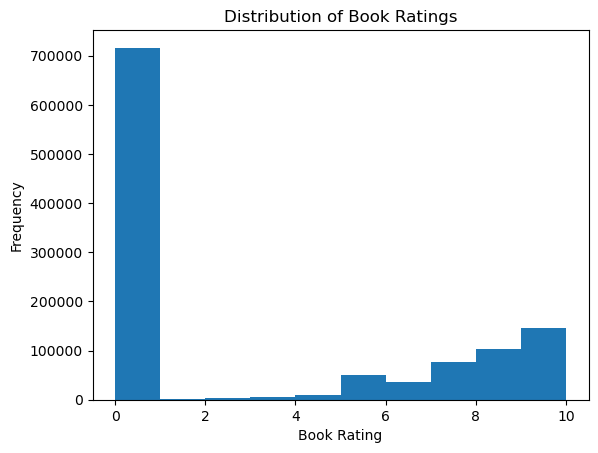

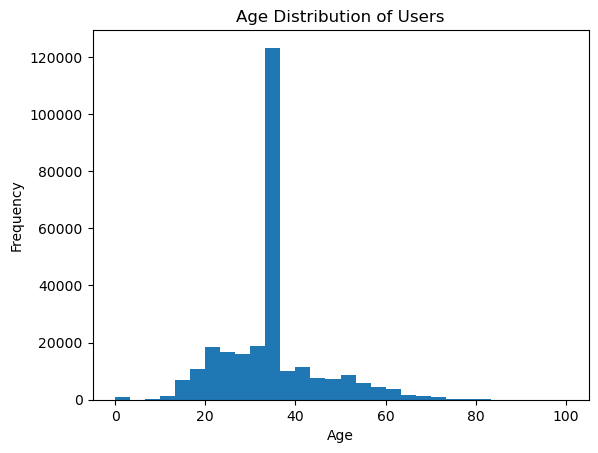

In [22]:
# Plot the distribution of book ratings in BX_Book_Ratings
plt.hist(BX_Book_Ratings["Book-Rating"], bins=10, range=(0, 10))
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Book Ratings")
plt.show()

# Explore demographic information (age distribution, user locations, etc.)
# Age distribution of users
plt.hist(BX_Users["Age"], bins=30, range=(0, 100))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Users")
plt.show()

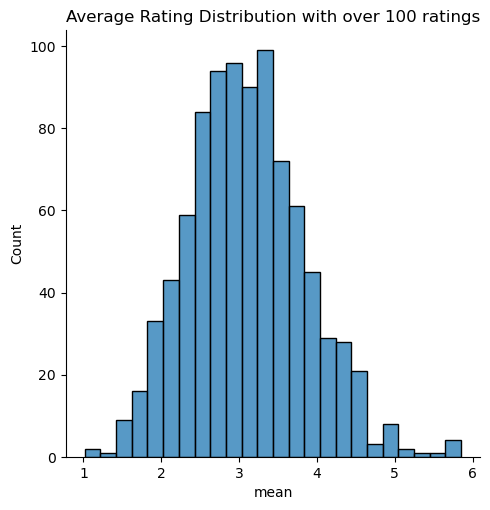

In [23]:
#Histograms of average book ratings
distro_ratings= BX_complete.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count']).sort_values(by='count',ascending=False).reset_index()

distro_ratings_2= distro_ratings.loc[distro_ratings['count'] > 100]
graph_2= sns.displot(distro_ratings_2['mean'])
graph_2.set(title='Average Rating Distribution with over 100 ratings')
plt.show()

In [24]:
#Data Viz of the top 10 most popular book titles
popular_titles = BX_complete["Book-Title"].value_counts().reset_index().head(10)
popular_titles=popular_titles.rename(columns={'index':'Book-Title', 'Book-Title':'Count'})
popular_titles

,Book-Title,Count
0,Wild Animus,2500
1,The Lovely Bones: A Novel,1295
2,The Da Vinci Code,898
3,A Painted House,838
4,The Nanny Diaries: A Novel,828
5,Bridget Jones's Diary,815
6,The Secret Life of Bees,774
7,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
8,The Red Tent (Bestselling Backlist),723
9,Angels &amp; Demons,670


Text(0.5, 0, 'Count')

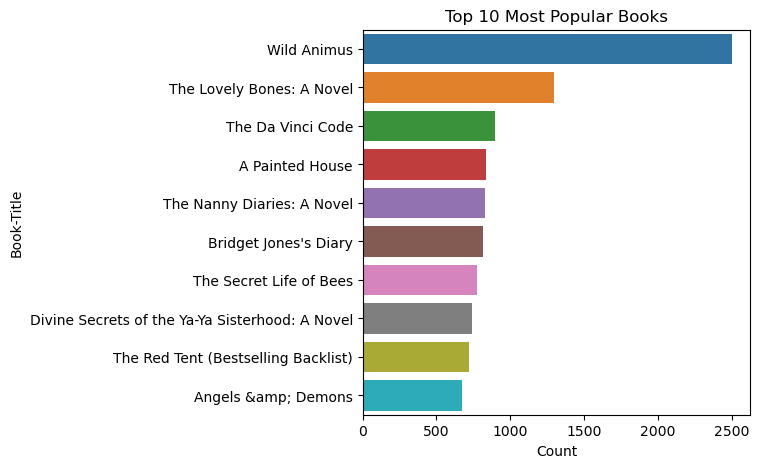

In [26]:
#Plotting the bar chart
plt.figure(figsize=(5, 5))
graph= sns.barplot(x="Count", y="Book-Title", data=popular_titles)
graph.set(title='Top 10 Most Popular Books')
graph.set_xlabel("Count")

In [27]:
#Data Viz for the top 10 highest rated books with at least 100 ratings
High_title=BX_complete.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count']).sort_values(by='mean',ascending=False).reset_index()
High_title= High_title.loc[High_title['count'] > 100].sort_values(by='mean',ascending=False).head(10)
High_title

,Book-Title,mean,count
51673,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
51727,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
51733,The Little Prince,5.815603,141
51991,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
52885,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
53468,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
54769,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
54868,The Perks of Being a Wallflower,5.144231,104
55042,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
67923,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368


Text(0.5, 0, 'Rating')

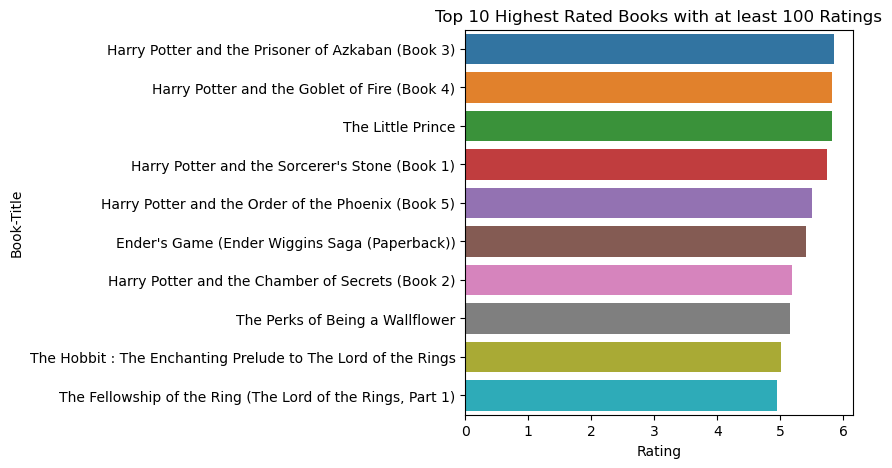

In [28]:
#Plotting the bar chart
plt.figure(figsize=(5, 5))
graph= sns.barplot(x="mean", y="Book-Title", data=High_title)
graph.set(title='Top 10 Highest Rated Books with at least 100 Ratings')
graph.set_xlabel("Rating")

In [29]:
#Data Viz for the 10 most popular authors
top_authors= popular_authors.reset_index()
top_authors= top_authors.rename(columns={'index':'Book-Author', 'Book-Author': 'Count'})
top_authors

,Book-Author,Count
0,Agatha Christie,631
1,William Shakespeare,567
2,Stephen King,523
3,Ann M. Martin,423
4,Francine Pascal,372
5,Carolyn Keene,371
6,Isaac Asimov,329
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


Text(0.5, 0, 'Total Ratings')

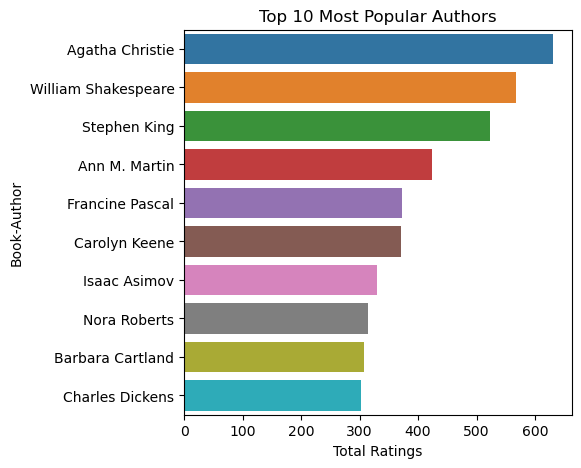

In [30]:
plt.figure(figsize=(5, 5))
graph= sns.barplot(x="Count", y="Book-Author", data=top_authors)
graph.set(title='Top 10 Most Popular Authors')
graph.set_xlabel("Total Ratings")

In [31]:
#Finding the 10 highest rated authors
rated_authors= BX_complete.groupby('Book-Author')['Book-Rating'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()
rated_authors= rated_authors.loc[rated_authors['count'] > 100].sort_values(by='mean',ascending=False).head(10)
rated_authors

,Book-Author,mean,count
19055,Clamp,6.513333,150
19848,Shel Silverstein,6.105820,189
22828,Bill Watterson,5.561818,550
22829,Antoine de Saint-ExupÃ©ry,5.553957,278
22840,Herge,5.519737,152
23075,Bradley Trevor Greive,5.431655,139
23172,J. K. Rowling,5.385832,2908
23523,Nick Bantock,5.292593,270
23774,J. R. R. Tolkien,5.165644,978
23826,Dr. Seuss,5.121294,371


Text(0.5, 0, 'Average Rating')

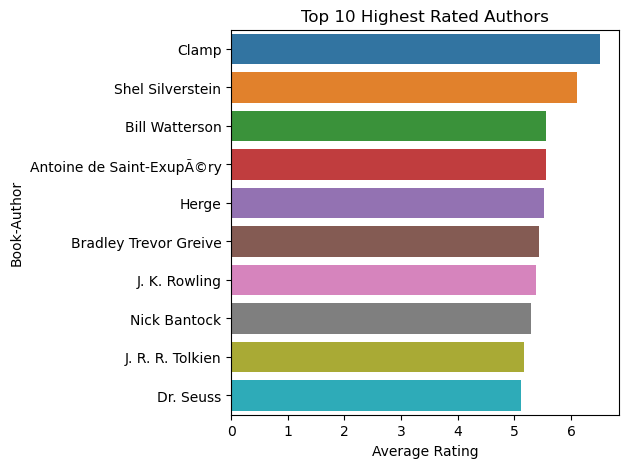

In [32]:
#Building the bar chart
plt.figure(figsize=(5, 5))
graph= sns.barplot(x="mean", y="Book-Author", data=rated_authors)
graph.set(title='Top 10 Highest Rated Authors')
graph.set_xlabel("Average Rating")

In [33]:
#Prep Data viz for the top 10 most popular publishers
df= popular_publishers.drop(columns=['index', 'level_0'])
df= df.reset_index().rename(columns={'index':'Publisher', 'Publisher':'Count'})
df

,Publisher,Count
0,Harlequin,7531
1,Silhouette,4219
2,Pocket,3894
3,Ballantine Books,3777
4,Bantam Books,3637
5,Scholastic,3158
6,Simon &amp; Schuster,2963
7,Penguin Books,2839
8,Berkley Publishing Group,2767
9,Warner Books,2726


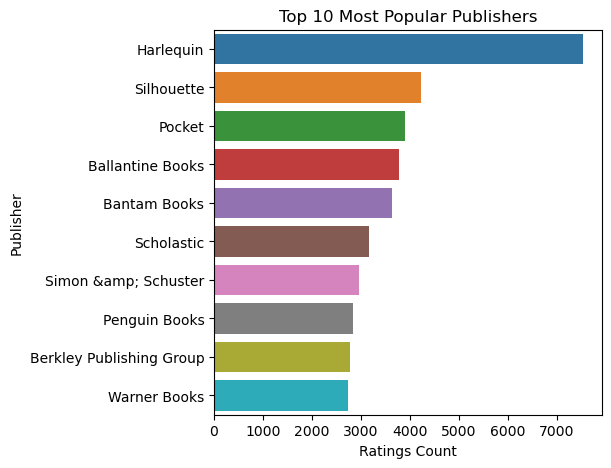

In [34]:
plt.figure(figsize=(5, 5))
graph= sns.barplot(x="Count", y="Publisher", data=df)
graph.set(title='Top 10 Most Popular Publishers')
graph.set_xlabel("Ratings Count")
plt.show()

In [29]:
# Step 5: Building a Recommendation System

In [39]:
#Reading in the cleaned CSV to ensure corrected encoding is utilized for the model
BX_complete = pd.read_csv("/Users/juliencounts/Desktop/Data_Analysis/Classes/Final_Project_4/Resources/BX_final.csv", encoding="latin-1")
BX_complete.head()

,Unnamed: 0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0,18.000000
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,34.751797
2,2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,8,0,34.751797
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8,0,34.751797
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,8,0,34.751797


In [40]:
avg_ratings=BX_complete.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count']).sort_values(by='mean',ascending=False).reset_index()

avg_ratings.loc[ (avg_ratings['mean'] >= 0) & (avg_ratings['mean'] <= 1), 'rating_between'] = "between 0 and 1"
avg_ratings.loc[ (avg_ratings['mean'] > 1) & (avg_ratings['mean'] <= 2), 'rating_between'] = "between 1 and 2"
avg_ratings.loc[ (avg_ratings['mean'] > 2) & (avg_ratings['mean'] <= 3), 'rating_between'] = "between 2 and 3"
avg_ratings.loc[ (avg_ratings['mean'] > 3) & (avg_ratings['mean'] <= 4), 'rating_between'] = "between 3 and 4"
avg_ratings.loc[ (avg_ratings['mean'] > 4) & (avg_ratings['mean'] <= 5), 'rating_between'] = "between 4 and 5"
avg_ratings.loc[ (avg_ratings['mean'] > 5) & (avg_ratings['mean'] <= 6), 'rating_between'] = "between 5 and 6"
avg_ratings.loc[ (avg_ratings['mean'] > 6) & (avg_ratings['mean'] <= 7), 'rating_between'] = "between 6 and 7"
avg_ratings.loc[ (avg_ratings['mean'] > 7) & (avg_ratings['mean'] <= 8), 'rating_between'] = "between 7 and 8"
avg_ratings.loc[ (avg_ratings['mean'] > 8) & (avg_ratings['mean'] <= 9), 'rating_between'] = "between 8 and 9"
avg_ratings.loc[ (avg_ratings['mean'] > 9) & (avg_ratings['mean'] <= 10), 'rating_between'] = "between 9 and 10"
avg_ratings.loc[ (avg_ratings['mean'] > 10) & (avg_ratings['mean'] <= 11), 'rating_between'] = "between 10 and 11"

avg_ratings.head(10)

,Book-Title,mean,count,rating_between
0,The Art of Spiritual Warfare,10.0,1,between 9 and 10
1,Tao Te Ching: An Illustrated Journey,10.0,1,between 9 and 10
2,Das fehlende Glied in der Kette. Sonderausgabe.,10.0,1,between 9 and 10
3,Tratado geral das grandezas do ÃÂ­nfimo,10.0,1,between 9 and 10
4,"Enemies All Around (The Lion Story Bible, No 24)",10.0,1,between 9 and 10
5,"Kodocha: Sana's Stage, Volume 2",10.0,1,between 9 and 10
6,"Pekingese: Everything About Purchase, Care, Nu...",10.0,1,between 9 and 10
7,Pele: Goddess of Hawaii's Volcanoes,10.0,1,between 9 and 10
8,Trashed Life,10.0,1,between 9 and 10
9,"Children's Literature, Briefly (2nd Edition)",10.0,1,between 9 and 10


In [41]:
ratings_df= pd.get_dummies(avg_ratings['rating_between'])
ratings_transformed= pd.concat([ratings_df, avg_ratings['mean'], avg_ratings['count']], axis=1)
ratings_transformed.head(15)

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,between 5 and 6,between 6 and 7,between 7 and 8,between 8 and 9,between 9 and 10,mean,count
0,0,0,0,0,0,0,0,0,0,1,10.0,1
1,0,0,0,0,0,0,0,0,0,1,10.0,1
2,0,0,0,0,0,0,0,0,0,1,10.0,1
3,0,0,0,0,0,0,0,0,0,1,10.0,1
4,0,0,0,0,0,0,0,0,0,1,10.0,1
5,0,0,0,0,0,0,0,0,0,1,10.0,1
6,0,0,0,0,0,0,0,0,0,1,10.0,1
7,0,0,0,0,0,0,0,0,0,1,10.0,1
8,0,0,0,0,0,0,0,0,0,1,10.0,1
9,0,0,0,0,0,0,0,0,0,1,10.0,1


In [42]:
min_max_scaler = MinMaxScaler()

In [43]:
book_model = min_max_scaler.fit_transform(ratings_transformed)

In [44]:
nrst_neighbor = NearestNeighbors(n_neighbors=6, algorithm='ball_tree')

In [45]:
nrst_neighbor.fit(book_model)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [46]:
#I had to learn this the hard way- the machine learning takes ~5 minutes. Be patient if the cell takes a long time!
distances, idlist = nrst_neighbor.kneighbors(book_model)

In [53]:
#Put any book from the booklist (BX_complete['Book-Title']) into BookRecommender() to get 6 recommendations
def BookRecommender(book_name):
    book_list_name = []
    book_id = avg_ratings[avg_ratings['Book-Title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(avg_ratings['Book-Title'].loc[newid])
    return book_list_name
    
BookNames = BookRecommender("The Giving Tree")
BookNames

['The Giving Tree',
 'Complete Chronicles of Narnia',
 'Die falsche FÃ\x83?Ã\x82Â¤hrte.',
 'The Essential Calvin and Hobbes',
 'Der Strand',
 'Dragonflight']